# Importing modules

In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [512]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [513]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [514]:
re_df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

numerical:
'sqft_living', 
'sqft_lot',
'sqft_living15'
'sqft_lot15'
'sqft_above',
'sqft_basement'
'price'

categorical:
bedrooms
bathrooms
floors in integer
waterfront = categorical (yes/no)   = view?
'condition'
'grade'
'yr_built'
'yr_renovated'  = replace 0 with nan 
'zipcode'
'lat'
'long'


### dropping columns

In [515]:
re_df.drop(['id'],axis=1, inplace=True)
#re_df.drop(['date'],axis=1, inplace=True)
#re_df.drop(['sqft_lot'],axis=1, inplace=True)
#re_df.drop(['lat'],axis=1, inplace=True)
#re_df.drop(['long'],axis=1, inplace=True)

### correcting data types

In [516]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [517]:
re_df["floors"] = re_df["floors"].astype(int)

### droping nan values

In [518]:
#re_df.dropna(inplace=True)

### removing duplicates

In [519]:
#re_df.drop_duplicates(inplace=True)

### Replacing null values with nan

#### years renovated

The yr_renovated column has more than 20.683 values=0. Does that make sense? .....

In [520]:
#re_df.yr_renovated.hist()

In [521]:
#re_df["yr_renovated"].replace(0, np.nan, inplace=True)

#re_df["view"].replace(0, np.nan, inplace=True)

In [522]:
#re_df.yr_renovated.hist()

#### square feet basement

<AxesSubplot:>

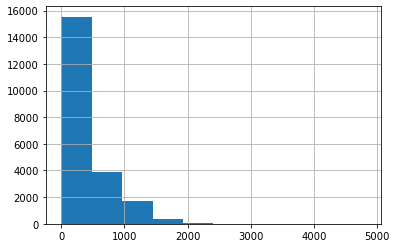

In [523]:
re_df.sqft_basement.hist()

<AxesSubplot:>

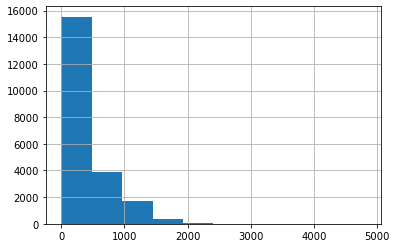

In [524]:
#re_df["sqft_basement"].replace(0, np.nan, inplace=True)
re_df.sqft_basement.hist()

### renaming waterfront column features

In [525]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [526]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

In [527]:
re_df["view"]

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: view, Length: 21597, dtype: int64

In [528]:
def view(x):
    if x == 0:
        return 'bad view'
    elif x == 1:
        return 'ok view'
    elif x == 2:
        return 'good view'
    elif x == 3:
        return 'very good view'
    elif x == 4:
        return 'great view'

In [529]:
re_df["view"] = list(map(view,re_df["view"])) 
re_df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1,no,bad view,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2,no,bad view,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1,no,bad view,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1,no,bad view,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1,no,bad view,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3,no,bad view,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2,no,bad view,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2,no,bad view,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2,no,bad view,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### concatinate lat & long

In [530]:
#re_df['location'] = re_df[['long', 'lat']].apply(tuple, axis=1)
#re_df.drop(['lat'],axis=1, inplace=True)
#re_df.drop(['long'],axis=1, inplace=True)


### removing outliers

#### bedrooms

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

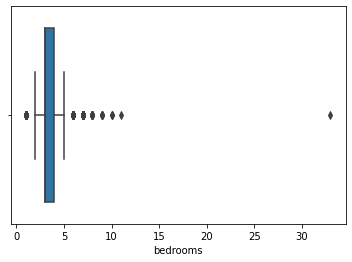

In [531]:
sns.boxplot(re_df['bedrooms'])

In [532]:
Q1 = re_df['bedrooms'].quantile(0.25)
Q3 = re_df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bedrooms'] >= Q1 - 1.5 * IQR) & (re_df['bedrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

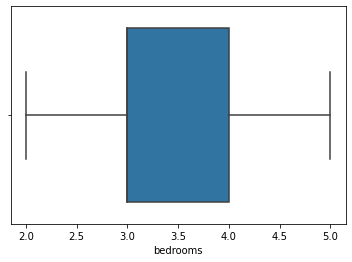

In [533]:
sns.boxplot(re_df['bedrooms'])

530 rows removed

#### bathrooms

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

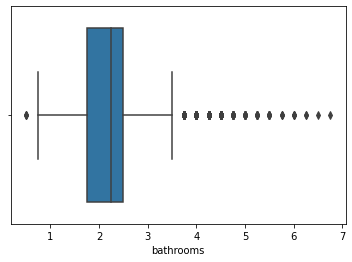

In [534]:
sns.boxplot(re_df['bathrooms'])

In [535]:
Q1 = re_df['bathrooms'].quantile(0.25)
Q3 = re_df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bathrooms'] >= Q1 - 1.5 * IQR) & (re_df['bathrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

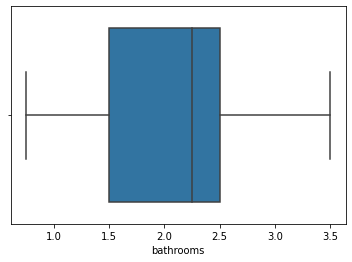

In [536]:
sns.boxplot(re_df['bathrooms'])

461 rows removed

#### further exploration

In [537]:
#re_df = re_df[re_df.sqft_above != 7420]

In [538]:
#re_df = re_df[re_df.sqft_lot15 != 560617]

## Plot the Correlation Heatmap

In [539]:
#g = sns.PairGrid(re_df)
#g.map(sns.scatterplot)

## X Y split

In [540]:
X=re_df.drop("price", axis=1)
y=re_df["price"]

## Data Splitting

In [541]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [542]:
y_train =y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [543]:
X_train_cat=X_train[['bedrooms','bathrooms','floors', 'view', 'waterfront','condition','grade','yr_built','zipcode', 'lat', 'long']]
X_train_cat

X_test_cat=X_test[['bedrooms','bathrooms','floors','view','waterfront','condition','grade','yr_built','zipcode','lat', 'long']]
X_test_cat

,bedrooms,bathrooms,floors,view,waterfront,condition,grade,yr_built,zipcode,lat,long
4997,3,1.00,1,bad view,no,4,7,1955,98106,47.5334,-122.365
14870,2,2.00,2,bad view,no,3,8,1934,98034,47.7162,-122.246
3276,3,1.00,1,bad view,no,3,7,1925,98103,47.6670,-122.333
18361,4,1.50,2,bad view,no,4,10,1910,98112,47.6360,-122.301
20776,2,2.00,2,bad view,no,3,8,2014,98112,47.6205,-122.299
...,...,...,...,...,...,...,...,...,...,...,...
15332,3,2.50,2,bad view,no,3,8,2005,98029,47.5478,-122.000
7987,4,2.50,2,bad view,no,3,7,2007,98042,47.3349,-122.059
12205,4,3.50,2,bad view,no,3,10,2008,98004,47.5885,-122.199
10163,3,1.00,1,bad view,no,4,7,1958,98002,47.2850,-122.206


In [544]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,...,long_-121.417,long_-121.364,long_-121.352,long_-121.321,long_-121.319,view_good view_1,view_great view_1,view_ok view_1,view_very good view_1,waterfront_yes_1
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6180,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [545]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [546]:
X_train_num=X_train[['sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
X_test_num

,sqft_living15,sqft_lot15,sqft_above,sqft_basement
4997,1340,6435,1090,0
14870,2890,22000,2180,0
3276,2060,4080,1240,0
18361,1970,4431,2550,0
20776,1580,1202,950,510
...,...,...,...,...
15332,1400,1138,1480,0
7987,2230,5750,2320,0
12205,2080,9676,2880,840
10163,990,8000,1864,0


In [547]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [548]:
X_test_scaled=std_scaler.transform(X_test_num)

In [549]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.03939982 -0.30010814 -0.49842372  2.60866442]
 [-0.73050607 -0.27271824 -0.83135298 -0.65372417]
 [ 2.10274758  0.29112246  0.89987917 -0.65372417]
 ...
 [ 1.56381346 -0.09550557  1.69890939 -0.65372417]
 [-0.69970983 -0.28116998 -1.05774488  0.91793748]
 [ 0.22417723 -0.33008052 -0.17881163 -0.65372417]]
--------
[[-0.96147783 -0.23613315 -0.8713045  -0.65372417]
 [ 1.42523041  0.37290088  0.58026708 -0.65372417]
 [ 0.14718664 -0.32828061 -0.67154694 -0.65372417]
 ...
 [ 0.17798288 -0.10931791  1.51246901  1.34657248]
 [-1.50041195 -0.17489716  0.15944449 -0.65372417]
 [-0.51493242 -0.27663108 -0.69818128  0.77505915]]


In [550]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [551]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### Quantile Transformer
- sqft_living15
- sqft_lot15
- sqft_above


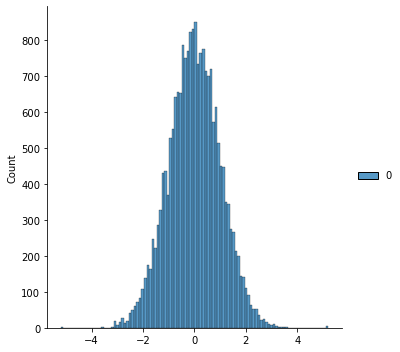

In [552]:
qt = QuantileTransformer(output_distribution="normal")
sqft_living15=qt.fit_transform(re_df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living15)

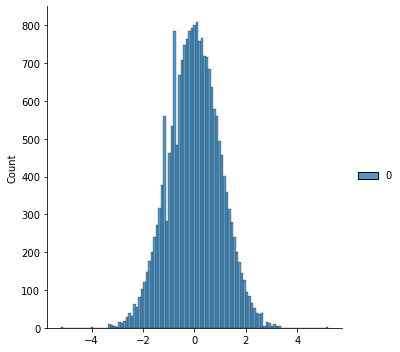

In [553]:
qt = QuantileTransformer(output_distribution="normal")
sqft_lot15=qt.fit_transform(re_df['sqft_lot15'].to_numpy().reshape(-1,1))
sns.displot(sqft_lot15)

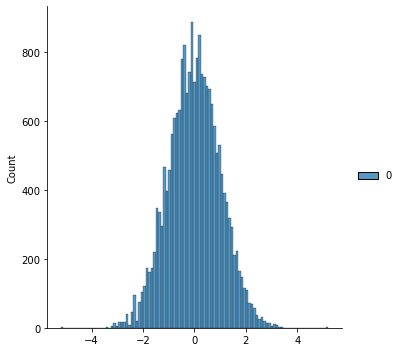

In [554]:
qt = QuantileTransformer(output_distribution="normal")
sqft_above=qt.fit_transform(re_df['sqft_above'].to_numpy().reshape(-1,1))
sns.displot(sqft_above)

### Power Transformer

## Concatination 

In [555]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [556]:
X_train_con

,sqft_living15,sqft_lot15,sqft_above,sqft_basement,bedrooms,bathrooms,floors,condition,grade,yr_built,zipcode,lat,long,view_good view,view_great view,view_ok view,view_very good view,waterfront_yes
0,0.039400,-0.300108,-0.498424,2.608664,5,1.75,1,4,7,1945,98144,47.5738,-122.315,0,0,0,0,0
1,-0.730506,-0.272718,-0.831353,-0.653724,3,1.75,1,4,7,1925,98136,47.5445,-122.391,0,0,0,0,0
2,2.102748,0.291122,0.899879,-0.653724,4,2.50,1,4,9,1967,98004,47.6214,-122.227,0,0,0,0,0
3,1.594610,-0.292282,0.580267,1.822834,4,2.50,2,3,9,1937,98199,47.6325,-122.394,1,0,0,0,0
4,0.655325,1.134105,1.099637,-0.653724,4,2.25,2,4,8,1980,98053,47.6555,-122.042,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,1.594610,0.384718,1.805447,-0.653724,3,2.50,1,3,10,1954,98177,47.7635,-122.377,0,0,0,0,0
14420,-1.007672,-0.407359,0.060897,1.656142,4,2.25,2,3,7,1910,98144,47.5890,-122.313,0,0,0,0,0
14421,1.563813,-0.095506,1.698909,-0.653724,3,2.50,2,3,8,2003,98019,47.7440,-121.976,0,0,0,0,0
14422,-0.699710,-0.281170,-1.057745,0.917937,2,1.75,1,3,7,1996,98118,47.5565,-122.275,0,0,0,0,0


##  Apply Linear Regression

### Modelling using Statsmodels

In [557]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1805.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:20:22   Log-Likelihood:            -1.9412e+05
No. Observations:               14424   AIC:                         3.883e+05
Df Residuals:                   14405   BIC:                         3.884e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.374e+06   3

In [558]:
predictions_test

0       3.232130e+05
1       8.467194e+05
2       4.955529e+05
3       1.006728e+06
4       4.086229e+05
            ...     
6177    3.704938e+05
6178    2.589919e+05
6179    9.276003e+05
6180    2.762563e+05
6181    3.475811e+05
Length: 6182, dtype: float64

In [559]:
#display adjusted R-squared
print(model.rsquared_adj)

0.6923849878594397


### Modeling using Scikit Learn

In [560]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [561]:
model.coef_

array([ 3.01388170e+04, -5.11394191e+02,  9.29920679e+04,  4.83123586e+04,
       -2.56830450e+04,  2.34571298e+04,  2.04766348e+04,  2.95189710e+04,
        1.01917714e+05, -2.51041317e+03, -4.47207687e+02,  5.79973004e+05,
       -1.34887673e+05,  7.11178052e+04,  3.25546609e+05,  9.66849980e+04,
        1.49329295e+05,  3.83530429e+05])

In [562]:
model.intercept_

4374289.086702205

Making prediction

In [563]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [564]:
y_test

0        365000
1        750000
2        625000
3        952500
4        699999
         ...   
6177     450000
6178     305000
6179    1450000
6180     235000
6181     430000
Name: price, Length: 6182, dtype: int64

In [565]:
y_pred

array([323213.03369525, 846719.39740916, 495552.89628057, ...,
       927600.28596466, 276256.28687518, 347581.07764053])

In [566]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,365000,3.232130e+05
1,750000,8.467194e+05
2,625000,4.955529e+05
3,952500,1.006728e+06
4,699999,4.086229e+05
...,...,...
6177,450000,3.704938e+05
6178,305000,2.589919e+05
6179,1450000,9.276003e+05
6180,235000,2.762563e+05


Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

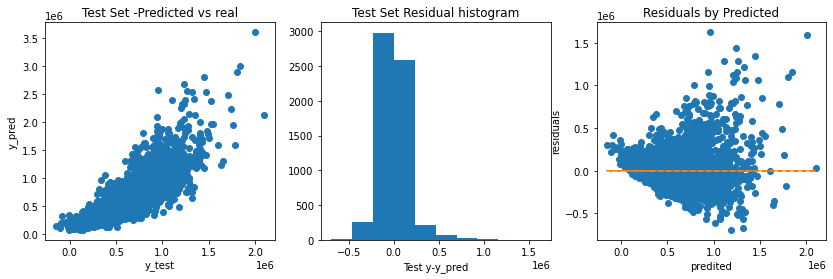

In [567]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred  Homoescdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [568]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

28064413001.030167
112796.16448218122


In [569]:
R2=r2_score(y_test,y_pred)
R2

0.6899227673735282

In [570]:
X_test.shape[1]

19

In [571]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.6889666707458257

#### Feature Importance

In [572]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [573]:
features_importances

,Attribute,Importance
10,zipcode,447.207687
1,sqft_lot15,511.394191
9,yr_built,2510.413174
6,floors,20476.634850
5,bathrooms,23457.129828
4,bedrooms,25683.045031
7,condition,29518.971007
0,sqft_living15,30138.816964
3,sqft_basement,48312.358625
13,view_good view,71117.805195


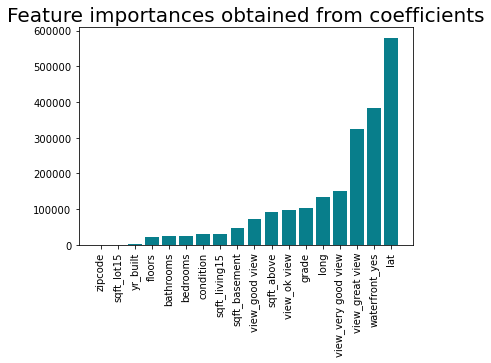

In [574]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [575]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

112796.16448218124

In [576]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

28064413001.03026

In [577]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

167524.36539509785

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

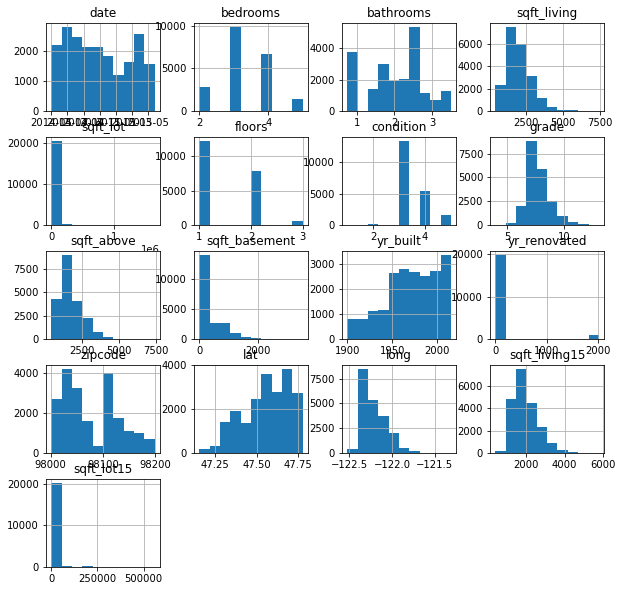

In [578]:
X.hist(figsize=(10,10))